# Image classification of interior design styles
resource: https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

In [192]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random

from tensorflow import keras
from keras import layers
from keras.models import Sequential

### dataset
local path = 'C:\Users\keith\Google Drive\AIP 3\images\training'

In [193]:
import pathlib
local_path = r'C:\Users\keith\Google Drive\AIP 3\images\training'
data_dir = pathlib.Path(local_path)
print(data_dir)

C:\Users\keith\Google Drive\AIP 3\images\training


In [194]:
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

1243


In [195]:
raw_images_balinese = list(data_dir.glob('balinese/*'))
raw_images_industrial = list(data_dir.glob('industrial/*'))
raw_images_minimalist = list(data_dir.glob('minimalist/*'))
raw_images_art_deco = list(data_dir.glob('art deco/*'))
raw_images_bohemian = list(data_dir.glob('bohemian/*'))

104, C:\Users\keith\Google Drive\AIP 3\images\training\balinese\istockphoto-1299268040-612x612.jpg


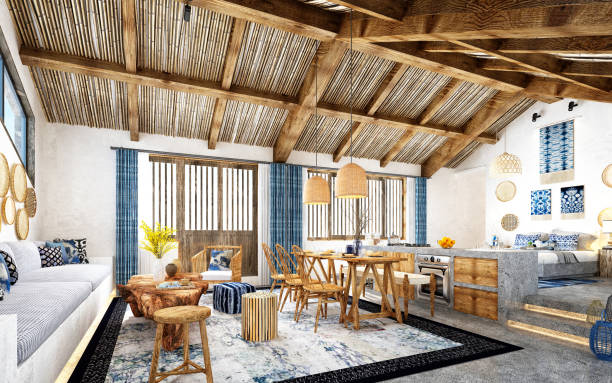

In [75]:
random_index = random.randint(0, len(raw_images_balinese))
print(random_index, str(raw_images_balinese[random_index]), sep=', ')
PIL.Image.open(str(raw_images_balinese[random_index]))

66, C:\Users\keith\Google Drive\AIP 3\images\training\industrial\istockphoto-1141600802-612x612.jpg


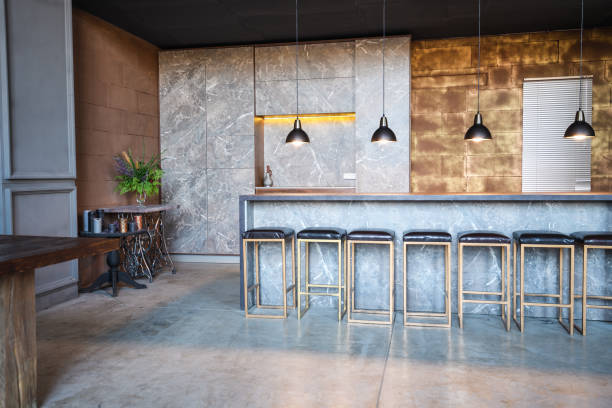

In [76]:
random_index = random.randint(0, len(raw_images_industrial))
print(random_index, str(raw_images_industrial[random_index]), sep=', ')
PIL.Image.open(str(raw_images_industrial[random_index]))

100, C:\Users\keith\Google Drive\AIP 3\images\training\minimalist\istockphoto-1202077460-612x612.jpg


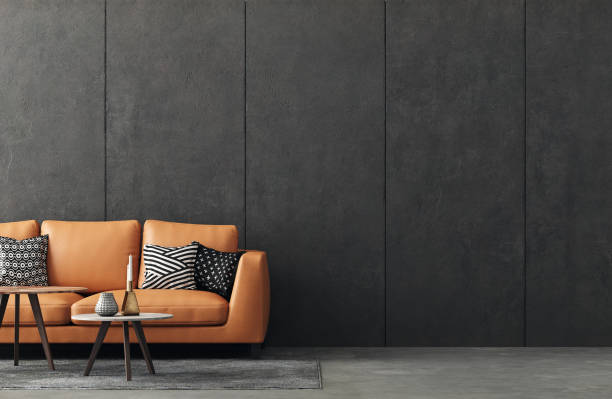

In [78]:
random_index = random.randint(0, len(raw_images_minimalist))
print(random_index, str(raw_images_minimalist[random_index]), sep=', ')
PIL.Image.open(str(raw_images_minimalist[random_index]))

81, C:\Users\keith\Google Drive\AIP 3\images\training\bohemian\istockphoto-1166442687-612x612.jpg


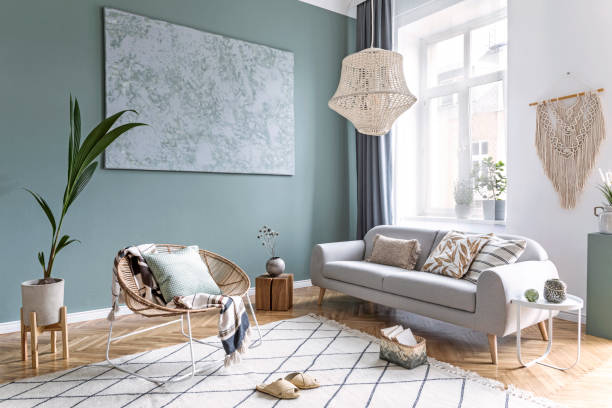

In [79]:
random_index = random.randint(0, len(raw_images_bohemian))
print(random_index, str(raw_images_bohemian[random_index]), sep=', ')
PIL.Image.open(str(raw_images_bohemian[random_index]))

13, C:\Users\keith\Google Drive\AIP 3\images\training\art deco\Art+Deco+Inspired+Room.jpg


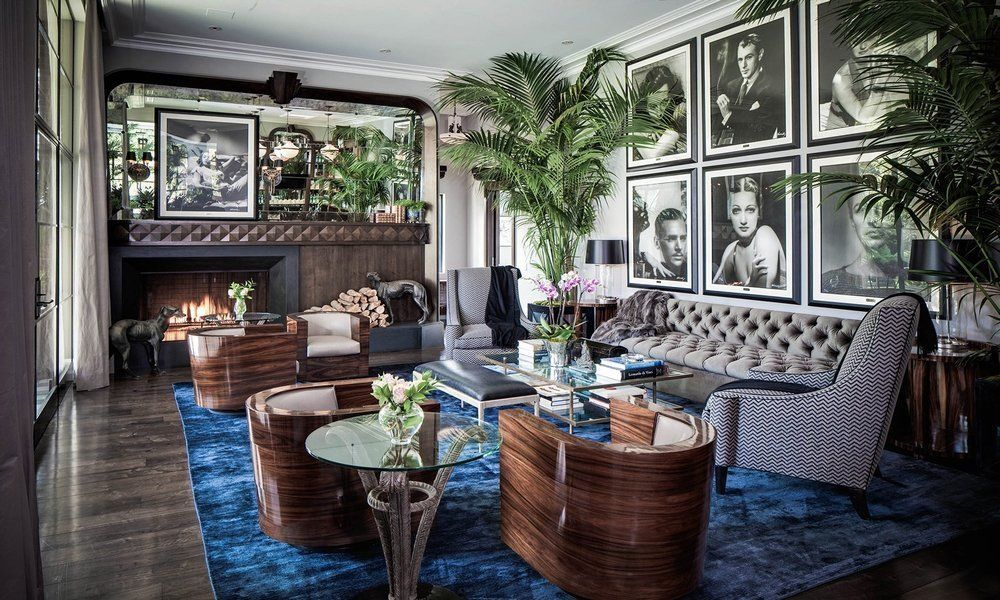

In [103]:
random_index = random.randint(0, len(raw_images_art_deco))
print(random_index, str(raw_images_art_deco[random_index]), sep=', ')
PIL.Image.open(str(raw_images_art_deco[random_index]))

### load data using a Keras utility
Let's load these images off disk using the helpful tf.keras.utils.image_dataset_from_directory utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code. If you like, you can also write your own data loading code from scratch by visiting the Load and preprocess images tutorial.
https://www.tensorflow.org/tutorials/load_data/images

In [200]:
batch_size = 20
img_height = 200
img_width = 200
seed = 129

In [201]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

Found 1180 files belonging to 5 classes.
Using 944 files for training.


In [202]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

Found 1180 files belonging to 5 classes.
Using 236 files for validation.


In [203]:
class_names = train_ds.class_names
print(class_names)

['art deco', 'balinese', 'bohemian', 'industrial', 'minimalist']


### visualise the data

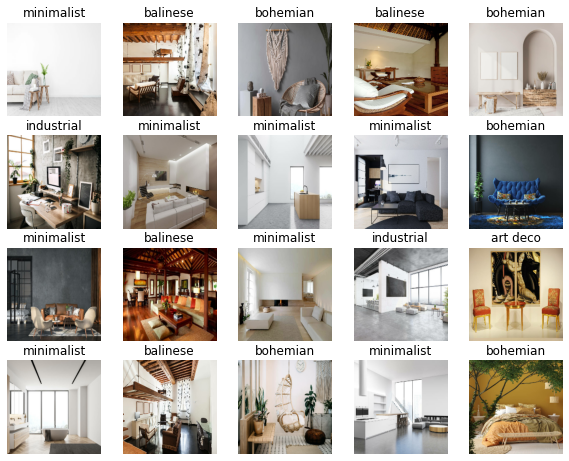

In [204]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(batch_size):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [205]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 200, 200, 3)
(20,)


### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:
* Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
* Dataset.prefetch overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the Prefetching section of the Better performance with the tf.data API guide.

In [206]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:

In [111]:
normalization_layer = layers.Rescaling(1./255)

0.0001960904 1.0
tf.Tensor(
[[0.47544438 0.36531627 0.24640515]
 [0.49350578 0.33094692 0.22848614]
 [0.49907866 0.31580737 0.21337599]
 [0.4887496  0.31405437 0.20141178]
 [0.47423533 0.29776472 0.18579005]
 [0.46039918 0.27607563 0.17431094]
 [0.46426472 0.27804077 0.17648344]
 [0.47016644 0.28163725 0.17820565]
 [0.47080395 0.2792549  0.18497163]
 [0.44784835 0.25961307 0.16157381]
 [0.42547947 0.23730297 0.1393226 ]
 [0.40942645 0.22681364 0.1336029 ]
 [0.43729907 0.23137134 0.13039094]
 [0.4522205  0.23805624 0.1327181 ]
 [0.4502244  0.24344987 0.13935183]
 [0.45145115 0.24616653 0.14206849]
 [0.458297   0.25330678 0.15111625]
 [0.4527113  0.2449216  0.14685565]
 [0.44884318 0.24385296 0.14189216]
 [0.4419615  0.22812289 0.13954972]
 [0.4459739  0.22972555 0.14116016]
 [0.4159472  0.20132953 0.11425888]
 [0.43795174 0.22029415 0.12814783]
 [0.4371465  0.22140193 0.1290686 ]
 [0.42206064 0.21524873 0.12192158]
 [0.41752636 0.2104773  0.11978432]
 [0.41528648 0.21528648 0.12627563]


(-0.5, 199.5, 199.5, -0.5)

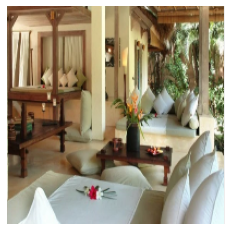

In [112]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
print(first_image[0])

plt.imshow(first_image)
plt.axis("off")

### Create the model
The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy—the goal of this tutorial is to show a standard approach.

In [207]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
For this tutorial, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [208]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

In [209]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 64)       

### Train the model

In [210]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
48/48 [==============================] - 15s 273ms/step - loss: 1.5439 - accuracy: 0.3390 - val_loss: 1.2692 - val_accuracy: 0.4364
Epoch 2/10
48/48 [==============================] - 13s 274ms/step - loss: 1.2075 - accuracy: 0.5074 - val_loss: 1.1771 - val_accuracy: 0.4958
Epoch 3/10
48/48 [==============================] - 13s 274ms/step - loss: 1.0327 - accuracy: 0.5847 - val_loss: 1.1122 - val_accuracy: 0.5508
Epoch 4/10
48/48 [==============================] - 13s 278ms/step - loss: 0.8885 - accuracy: 0.6589 - val_loss: 1.1579 - val_accuracy: 0.5424
Epoch 5/10
48/48 [==============================] - 13s 279ms/step - loss: 0.6438 - accuracy: 0.7680 - val_loss: 1.3230 - val_accuracy: 0.5593
Epoch 6/10
48/48 [==============================] - 14s 282ms/step - loss: 0.4155 - accuracy: 0.8623 - val_loss: 1.2837 - val_accuracy: 0.5805
Epoch 7/10
48/48 [==============================] - 13s 268ms/step - loss: 0.2528 - accuracy: 0.9174 - val_loss: 1.6167 - val_accuracy: 0.5466

### Visualize training results
Create plots of loss and accuracy on the training and validation sets:

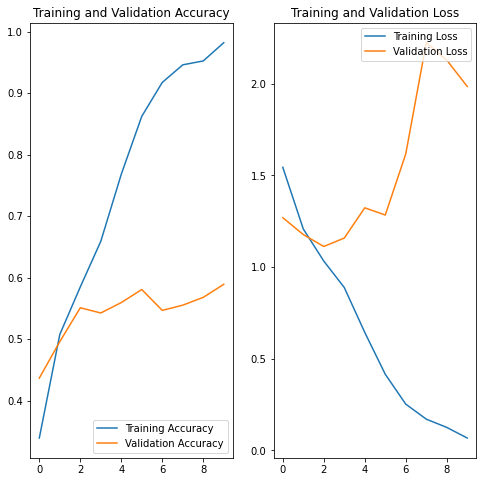

In [211]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data augmentation
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. These can be included inside your model like other layers, and run on the GPU.

In [240]:
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
   layers.RandomRotation(0.2),
   layers.RandomZoom(0.2),
   layers.RandomContrast(0.2),
   ]
)

(20, 200, 200, 3)


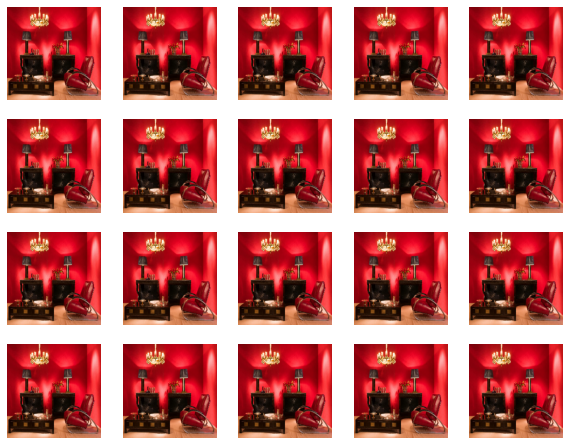

In [247]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(batch_size):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [254]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile and train the model

In [255]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [256]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 200, 200, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                

In [257]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
48/48 [==============================] - 16s 322ms/step - loss: 1.5626 - accuracy: 0.3453 - val_loss: 1.3859 - val_accuracy: 0.3898
Epoch 2/15
48/48 [==============================] - 15s 318ms/step - loss: 1.3781 - accuracy: 0.3824 - val_loss: 1.3084 - val_accuracy: 0.4449
Epoch 3/15
48/48 [==============================] - 15s 316ms/step - loss: 1.3023 - accuracy: 0.4587 - val_loss: 1.2544 - val_accuracy: 0.4915
Epoch 4/15
48/48 [==============================] - 15s 314ms/step - loss: 1.2143 - accuracy: 0.4947 - val_loss: 1.2515 - val_accuracy: 0.3898
Epoch 5/15
48/48 [==============================] - 16s 324ms/step - loss: 1.2243 - accuracy: 0.4894 - val_loss: 1.1453 - val_accuracy: 0.5212
Epoch 6/15
48/48 [==============================] - 16s 324ms/step - loss: 1.1627 - accuracy: 0.5286 - val_loss: 1.1587 - val_accuracy: 0.4915
Epoch 7/15
48/48 [==============================] - 16s 324ms/step - loss: 1.1242 - accuracy: 0.5307 - val_loss: 1.1373 - val_accuracy: 0.5424

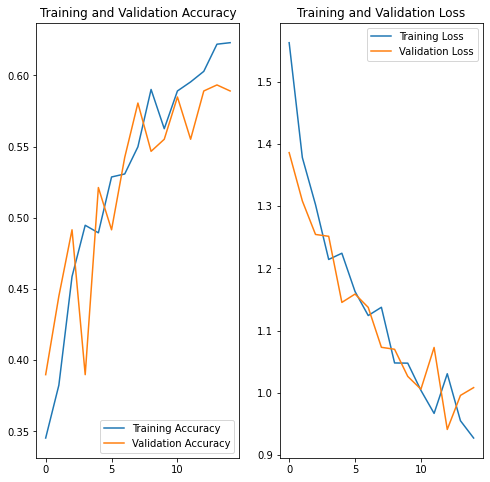

In [258]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on new data

In [101]:
my_style_url = 'https://linesmag.com/wp-content/uploads/2019/10/Tradewinds-General-Contracting-Inc.-1170x780.jpg'
my_style_path = tf.keras.utils.get_file('random_style', cache_dir=local_path, cache_subdir='', origin=my_style_url)

163840/148784 [=================================] - 1s 4us/step


In [102]:
my_style_path

'C:\\Users\\keith\\Google Drive\\AIP 3\\images\\training\\random_style'

In [103]:
my_img = tf.keras.utils.load_img(my_style_path, target_size=(img_height, img_width))
my_img_array = tf.keras.utils.img_to_array(my_img)
my_img_array = tf.expand_dims(my_img_array, 0) # Create a batch

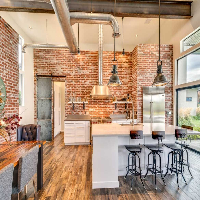

In [104]:
my_img

In [118]:
my_predictions = model.predict(my_img_array)
my_score = tf.nn.softmax(my_predictions[0])

import pandas as pd
result_df = pd.DataFrame(my_predictions.reshape(num_classes,), index=class_names, columns=['score'])
result_df['confidence'] = ['{:.2f}'.format(float(x) * 100) for x in my_score]
result_df = result_df.sort_values(by='score', ascending=False)
print(result_df)

               score confidence
industrial  3.708081      52.04
art deco    3.162622      30.16
balinese    2.611843      17.39
bohemian   -1.137854       0.41
minimalist -8.501523       0.00


## save model

In [268]:
model.save('model_2')

INFO:tensorflow:Assets written to: model_2\assets


In [259]:
import requests
from PIL import Image
import pandas as pd

def api_predict_interior_design_style(_img_url):
  # download image
  _file_name = 'tmp_file'
  r = requests.get(_img_url, allow_redirects=True)
  open(_file_name, 'w+b').write(r.content)

  # load and resize image
  with Image.open(_file_name) as _img:
    _img = _img.resize((200, 200))

  # array image
  _img_array = tf.keras.utils.img_to_array(_img)
  _img_array = tf.expand_dims(_img_array, 0)

  # load model
  # _model = tf.keras.models.load_model('model')

  # predict image
  _predictions = model.predict(_img_array)
  _score = tf.nn.softmax(_predictions[0])

  _df = pd.DataFrame(_predictions.reshape(num_classes,), index=class_names, columns=['score'])
  _df['confidence'] = ['{:.2f}'.format(float(x) * 100) for x in _score]
  _df = _df.sort_values(by='score', ascending=False)
  print(_df, '\n')

  _entries = 0
  for _index, _confidence in enumerate(_df['confidence']):
    if float(_confidence) > 50:
      _entries += 1
      print(_df.index[_index], _confidence + '%', sep=': ')

  if _entries == 0:
    print(_df.index[0], _df['confidence'][0] + '%', sep=': ')
    print(_df.index[1], _df['confidence'][1] + '%', sep=': ')

  plt.imshow(_img)
  plt.axis("off")

               score confidence
art deco    5.352350      78.82
balinese    3.992494      20.23
industrial  0.766884       0.80
bohemian   -1.013988       0.14
minimalist -4.704534       0.00 

art deco: 78.82%


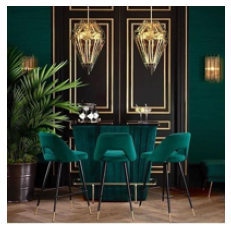

In [276]:
api_predict_interior_design_style('https://images.squarespace-cdn.com/content/v1/5c4c3678697a985352fd27f9/1560701194511-CXOFTGOLWRI2ZG9KESRS/Art+deco+inspired+bar%2C+bar+chairs+and+lighting+by+luxury+furniture+brand+Eichholtz?format=500w')